# Basic NumPy and Graph Plotting with Matplotlib
This work aims to applying the concept of __NumPy array and Matplotlib__ for solving physics problems by Python 3 and Jupyter Notebook. There are some solutions for tasks in this Python code.

## Reference:
- [Kinematic Equations and Free Fall](https://www.physicsclassroom.com/class/1DKin/Lesson-6/Kinematic-Equations-and-Free-Fall)

## P5.1 - Correct Einstein's mistakes
Special relativity is the area of physics deling with incredibly large velocities. In special relitivity, the momentum _p_ of an object with velocity _v_(in m/s), and mass _m_ (in kg) is given as.

$p=m.v.\gamma, \gamma=\frac{1}{\sqrt{1-\frac{v^{2}}{c^{2}}}}$

where c$\approx$ 300.000.000 m/s is the speed of light. The program below attempts to calculate the momentum of an object with speed equal to 1/3 the speed of light, and mass m = 0.14 kg. The program has many errors, and doesn't work. Copy and run the program. Correct the errors, and make it work like intended.

In [17]:
# Relativity Einstein
c = 3e8 # the speed of light in m/s
v = c / 3 # the velocity 1/3 the speed of light
m = 0.14 # mass in kg

# Calculate the relativity momentum
import numpy as np
gamma = 1 / (np.sqrt(1-(v/c)**2))
p_momentum = m * v * gamma

print(f'gamma = {gamma:.6f}')
print(f'p_momentum = {p_momentum:.6f}') # the momentum in kg m/s

gamma = 1.060660
p_momentum = 14849242.404917


## P5.2 - Rydberg's constant
Rydberg's constant $R_{\infty}$ for a heavy atom is used in physics to calculate the wavelength to spectral lines. The constant has been found to have the following value:

$R_{\infty}=\frac{m_{e}e_{4}}{8\varepsilon_{0}{2}h^{3}c}$

where,
- $m_{e}=9.109 x 10^{-31}$ m is the mass of an electron
- $e=1.602 x 10^{-19}$ C is the charge of a proton (also called the elementary charge)
- $\varepsilon_{0}=8.854 x 10^{-12}C V^{-1} m^{-1}$ is the electrical constant
- h = 6.626 x $10^{-34}$ J s is Planck's constant
- c = 3 x $10^{8}$ m/s is the speed of light.

write the program which assigns the values of the physical constants to variables, and use the variables to calculate the value of Rydberg's constant.

In [ ]:
# Calculate Rydberg's constant
me = 9.109e-31 # mass of an electron
e = 1.602e-19 # the charge of a proton
varepsilon0 = 8.854e-12 # the electrical constant
h = 6.626e-34 # Planck's constant
c = 3e8 # speed of the light

R_infinity = (me * e**4)/(8 * varepsilon0**2 * h**3 * c)
print(f'R infinity = {R_infinity:.6e}') # the Rydberg's constant

## P5.3 - Measure time
A ball is dropped straight down from a cliff with height $\mathnormal{h}$. The position of the ball after a time $\mathnormal{t}$ can be expressed as:

$y(t)=v_{0}t - \frac{1}{2}at^{2} + h$

where a is the acceleration (in $m/s^{2})$ and $v_{0}$ is the initial velocity of the ball (Measured in m/s). We wish to find for how long time $t_{1}$ such that $y(t_{1})=h_{1}$. The position of the ball is measured per $\Delta{t}$ seconds.

Write a program which finds out how long time $t_{1}$ it takes before the ball reaches height $h_{1}$ by using a while loop.
$h=10 m, y_{1}=5 m, \Delta{t}=0.01, v_{0}=0 m/s$ and $a = 9.81 m/s^{s}$.

The ball reaches 5 m after 1.01 s.
The ball reaches 5 after 1.010 s


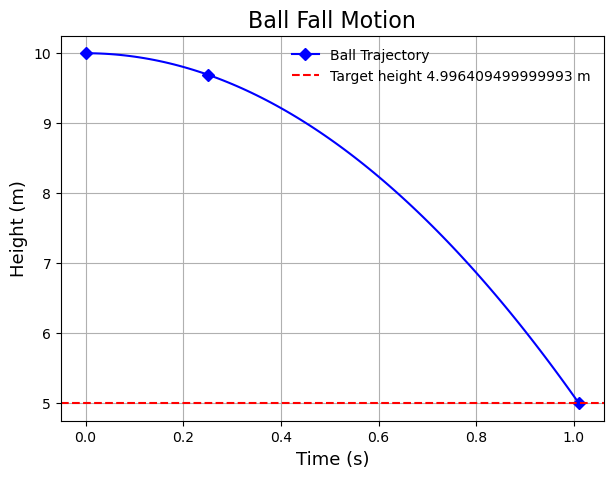

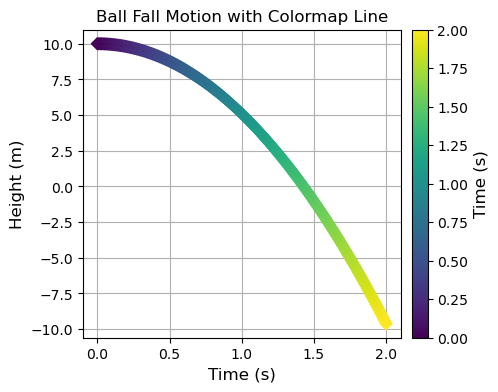

In [124]:
h = 10 # height in m
y1 = 5 # position of function of time t1 in m
v0 = 0 # velocity at t = 0 in m/s
a = 9.81 # acceleration due to gravity in m/s^2
dt = 0.01 # time step in s

# Calculate how long time t1, if y(t1) = h1.
y = h # initial positon
t = 0
t_values = [t]
y_values = [y]


# The position of the ball is measured per dt seconds
while y > y1:
    t = t + dt
    y = v0 * t - 0.5 * a * t**2 + h
    t_values.append(t)
    y_values.append(y)
    
# at this point, y <= y1
t1 = t
print(f'The ball reaches {y1} m after {t1:.2f} s.')

# The manual instruction
import numpy as np
ty1 = np.sqrt(2* (h - y1)/a)
print(f'The ball reaches {y1} after {ty1:.3f} s')

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(t_values, y_values, label= 'Ball Trajectory', marker='D', markevery=[0, 25, -1], color='b')
plt.axhline(y=y1, color='red', linestyle='--', label=f'Target height {y} m')
plt.xlabel('Time (s)',  fontsize=13, fontname='Sans serif')
plt.ylabel('Height (m)',  fontsize=13, fontname='Sans serif')
plt.title('Ball Fall Motion', fontsize=16, fontname='Sans serif')
plt.legend(framealpha=0)
plt.grid(True)
plt.show()

# Scatter plot with color map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
t = np.linspace(0, 2, 200)
y = 10 -0.5 * 9.81 * t**2

# Create segments for line
points = np.array([t,y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis =1)

# colormap
Lc=LineCollection(segments, cmap='viridis', linewidth=2, norm=plt.Normalize(t.min(), t.max()))
Lc.set_array(t) # color by time

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(t, y, c=t, cmap='viridis', marker='D')
ax.add_collection(Lc)
ax.autoscale()


# Adding colorbar
cbar = plt.colorbar(Lc, ax=ax, pad=0.03)
cbar.set_label('Time (s)')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Ball Fall Motion with Colormap Line')
ax.grid(True)
ax.set_axisbelow(True)
plt.savefig('Ballmotion_colormap.svg', bbox_inches='tight')
plt.show('Ball Fall Motion')



## P5.4 - Free Fall Motion
A ball is dropped from rest at a height of h = 100 m. The time intervals is 0.1 s up to 5 s. The constant gravitational acceleration g = 9.81 $m/s^{2}$.(a) What time does the ball hit the ground, (b) what is the velocity of the ball and (c) plot the position of the ball vs time as it falls. 

- Free Fall Motion
  - Impact time (when y(t)=0)
  
     $t_{ground}=\sqrt{\frac{2h_{0}}{g}}$
    
  - Initial Velocity at the ground

     $v_{ground}=gt_{ground}$
 
  - Position
 
    $y(t)=h_{0}-\frac{g}{t^{2}}$
 

(a) Ball hits the ground at t= 4.515 s
(b) velocity at the ground = 44.294 m/s


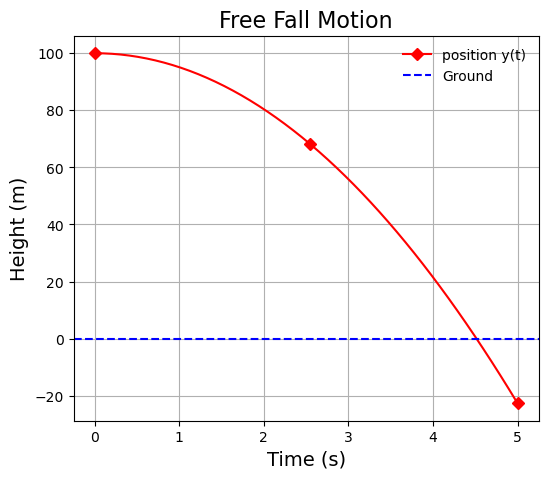

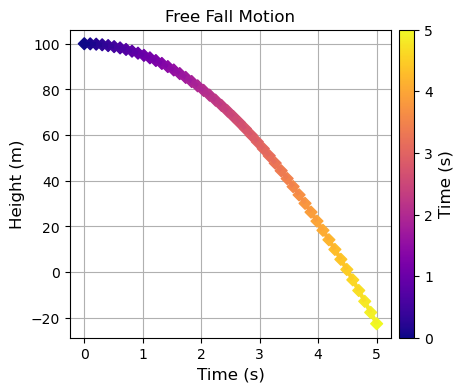

In [125]:
# (a) What time does the ball hits the ground with t_intervals = 0 - 5

# Basic numPy
import numpy as numpy

h0 = 100 # initial hight, in m
g = 9.81 #gravization in m/s^2


# Creating numpy arrays (np.linspace(start, stop, num) => the range built-in
t = np.linspace(0, 5, 50) # time interval 

# Position as a function of time
y = h0 - 0.5 * g * t**2

# time the ball hits the ground
t_ground = np.sqrt(2*h0/g)
print('(a) Ball hits the ground at t=',round(t_ground, 3), 's')

# Calculate the initial velocity of the ball 
v_ground = g * t_ground
print('(b) velocity at the ground =',round(v_ground, 3), 'm/s')

# Set plot the position of the ball vs time as it falls. 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(t, y, marker='D', markevery=[0, 25, -1], color='r', label='position y(t)')
plt.axhline(0, color='blue', linestyle='--', label='Ground')
plt.title('Free Fall Motion', fontsize=16, fontname='Sans serif')
plt.xlabel('Time (s)', fontsize=14, fontname='Sans serif')
plt.ylabel('Height (m)', fontsize=14, fontname='Sans serif')
plt.legend()
plt.legend(framealpha=0)
plt.grid(True)
plt.show()

# Scatter plot with color map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
t = np.linspace(0, 5, 50)
y = h0 - 0.5 * g * t**2

# Create segments for line
points = np.array([t,y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis =1)

# colormap
Lc=LineCollection(segments, cmap='plasma', linewidth=3, norm=plt.Normalize(t.min(), t.max()))
Lc.set_array(t) # color by time

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(t, y, c=t, cmap='plasma', marker='D')
ax.add_collection(Lc)
ax.autoscale()


# Adding colorbar
cbar = plt.colorbar(Lc, ax=ax, pad =0.02)
cbar.set_label('Time (s)')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Free Fall Motion')
plt.grid(True)
ax.set_axisbelow(True)
plt.savefig('Fallmotion_colormap.svg', bbox_inches='tight')
plt.show('Free Fall Motion')


## P5.6 -Relativistic Momentum
In classical physics, we define the momentum $\mathnormal{p}$ of an object with mass $\mathnormal{m}$ and velocity $\mathnormal{v}$ as 

                            $p=m x v$

A satellite with mass m = 1200 kg is trapped in the gravity of a black hole. It accelerates quickly from velocity $v=0$ to $v=0.9c$, where $\mathnormal{c}$ is the speed of light, $c\approx3x10^{8}$ m/s.

(a) write a program which prints a nicely formatted table to the terminal, containing the speed of the satellite in one column, and the momentum of the satellite in the other. Use time-intervals of $0.1c$ between $0c$ and $0.9c$.

__Hint__: Use scientific notation '%e' when printing the values, to avoid incredibly large floats. Alternatively, '%g', which picks the best notation for you. Try to limit the number of decimals to a reasonable number.


      Velocity (m/s) |         Momentum (kg.m/s)
---------------------------------------------
                   0 |                         0
               3e+07 |                   3.6e+10
               6e+07 |                   7.2e+10
               9e+07 |                  1.08e+11
             1.2e+08 |                  1.44e+11
             1.5e+08 |                   1.8e+11
             1.8e+08 |                  2.16e+11
             2.1e+08 |                  2.52e+11
             2.4e+08 |                  2.88e+11
             2.7e+08 |                  3.24e+11


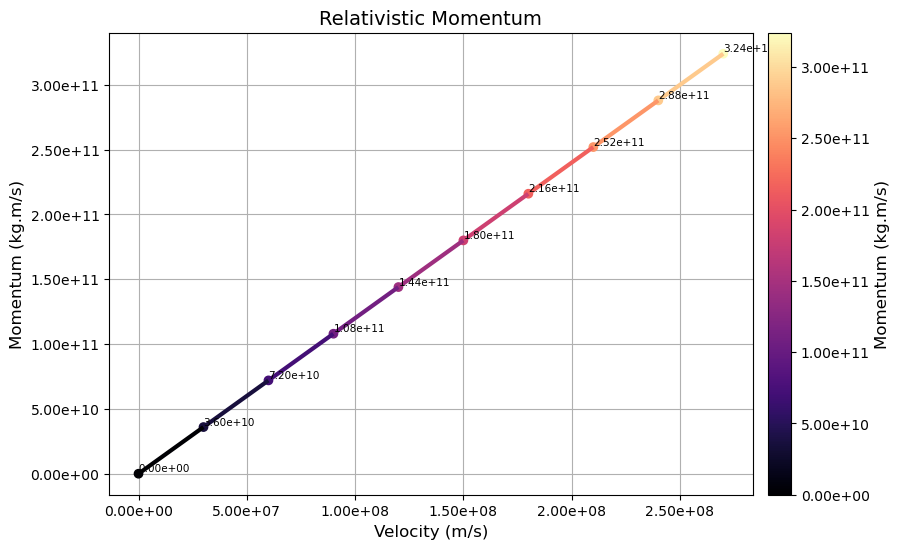

In [128]:
# Parameters 
m = 1200 # mass of satellite in kg
c = 3e8 # the speed of light on m/s
 
print(f'{'Velocity (m/s)':>20} | {'Momentum (kg.m/s)':>25}')
print('-' * 45)

# Calculate momentum with the interval velocity 0 to 0.9c
# Use time-intervals 0f 0.1c between 0c and 0.9c
for i in range(10): # time interval from 0c to 0.9c
    v = i * 0.1 * c # velocity 0 - 0.9c, where c is the the speed of  light.
    p = m * v
    print('%20.3g | %25.3g' % (v, p)) # use scientific notation '%g' to limit the number of decimals
    

# Scatter plot with color map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
v = np.linspace(0.0, 0.9, 10) * c
p = m * v #Classical Momentum

# Create segments for line
points = np.array([v,p]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis =1)

# colormap
Lc=LineCollection(segments, cmap='magma', linewidth=3, norm=plt.Normalize(p.min(), p.max()))
Lc.set_array(p) # color by momentum

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(v,p, c=p, cmap='magma', marker='o')
ax.add_collection(Lc)
ax.autoscale()


# Adding colorbar
cbar = plt.colorbar(Lc, ax=ax, pad =0.02)
cbar.set_label('Momentum (kg.m/s)')
cbar.formatter = ticker.FormatStrFormatter('%.2e')
cbar.update_ticks()

# Axis labels and formatting
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Momentum (kg.m/s)')
ax.set_title('Relativistic Momentum', fontsize=14)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
plt.grid(True)
ax.set_axisbelow(True)

# Add momentum values
for vx, px in zip(v, p):
    ax.text(vx, px, f'{px:.2e}', fontsize=7.5, ha='left', va='bottom')
plt.savefig('Relativistic_colormap.svg', bbox_inches='tight')
plt.show('Relativistic Momentum')


## P5.6 -Relativistic Momentum
In classical physics, we define the momentum $\mathnormal{p}$ of an object with mass $\mathnormal{m}$ and velocity $\mathnormal{v}$ as 

$p=m \times v$

A satellite with mass m = 1200 kg is trapped in the gravity of a black hole. It accelerates quickly from velocity $v=0$ to $v=0.9c$, where $\mathnormal{c}$ is the speed of light, $c\approx3x10^{8}$ m/s.

In exercise about - Correct Einstein's mistakes, we saw the momentum of an object is defined in special relative;y, which dealswith physics at very large velocities. We defines the momentum as

$p=m.v.\gamma, \gamma=\frac{1}{\sqrt{1-\frac{v^{2}}{c^{2}}}}$

This is actual momentum of any object, but the classical version in exercise a) is a good approximation at "small'velocities.
Expand your program such that it prints a table with three columns, the third one containing the momentum ad defined in special relativity.


Special velocity (m/s)  |    Momentum (kg.m/s)    |          gamma          |
-------------------------------------------------------------------------------
       0.00e+00         |        0.000e+00        |          1.000         |
       3.00e+07         |        3.618e+10        |          1.005         |
       6.00e+07         |        7.348e+10        |          1.021         |
       9.00e+07         |        1.132e+11        |          1.048         |
       1.20e+08         |        1.571e+11        |          1.091         |
       1.50e+08         |        2.078e+11        |          1.155         |
       1.80e+08         |        2.700e+11        |          1.250         |
       2.10e+08         |        3.529e+11        |          1.400         |
       2.40e+08         |        4.800e+11        |          1.667         |
       2.70e+08         |        7.433e+11        |          2.294         |


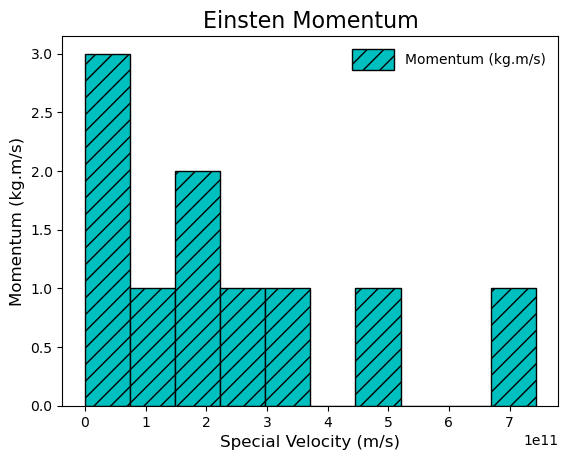

In [1]:
# Parameters 
m = 1200 # mass of satellite in kg
c = 3e8 # the speed of light on m/s

cw = 23 # column width
print(f'{"Special velocity (m/s)":^{cw}} | {"Momentum (kg.m/s)":^{cw}} | {"gamma":^{cw}} |')
print('-' * (cw * 3 + 10))

# (b) Calculate special momentum with the interval velocity 0 to 0.9c
# Use time-intervals 0f 0.1c between 0c and 0.9c
import numpy as np
for i in range(10): # time interval from 0c to 0.9c
    v = i * 0.1 * c # velocity 0 - 0.9c, where c is the the speed of  light.
    gamma = 1 / (np.sqrt(1-(v/c)**2))
    p_rel = m * v * gamma
    print(f'{v:^{cw}.2e} | {p_rel:^{cw}.3e} | {gamma:^{cw}.3f}|') # use scientific notation 'e and f' to limit the number of decimals

# Create histogram from the data
import numpy as np
import matplotlib.pyplot as plt
v= np.linspace(0.0, 0.9*c, 10)
gamma = 1 / (np.sqrt(1-(v/c)**2))
p_rel = m * v * gamma

import matplotlib.pyplot as plt
plt.hist(p_rel, label='Momentum (kg.m/s)', bins=10, facecolor='c', edgecolor='black', hatch='//', rwidth=8)
plt.xlabel('Special Velocity (m/s)', fontsize=12)
plt.ylabel('Momentum (kg.m/s)', fontsize=12)
plt.title('Einsten Momentum', fontsize=16)
plt.legend(fontsize=23)
plt.legend(framealpha=0, handleheight=2.0, handlelength=3)
plt.savefig('Einsten_momentum.svg', bbox_inches='tight')
plt.show()